In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
with open("../Data Engineering/PickleFiles/X_train.pickle", 'rb') as data:
    X_train = pickle.load(data)
with open("../Data Engineering/PickleFiles/X_test.pickle", 'rb') as data:
    X_test = pickle.load(data)
with open("../Data Engineering/PickleFiles/y_train.pickle", 'rb') as data:
    y_train = pickle.load(data)
with open("../Data Engineering/PickleFiles/y_test.pickle", 'rb') as data:
    y_test = pickle.load(data)

In [3]:
df1 = pd.read_csv("../Dataset/Train.csv")
df=df1.copy()
li = []
for i in range(len(df['label'])):
    if(df['label'][i]==0):
        li.append("Negative")
    elif(df['label'][i]==1):
        li.append("Neutral")
    else:
        li.append("Positive")
df['label_cat']=li

In [4]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [5]:
mnbc.fit(X_train, y_train)

MultinomialNB()

In [6]:
mnbc_pred = mnbc.predict(X_test)

In [7]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, mnbc.predict(X_train)))

The training accuracy is: 
0.8309375


In [8]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, mnbc_pred))

The test accuracy is: 
0.69125


In [9]:
# Classification report
print("Classification report")
print(classification_report(y_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       319
           1       0.66      0.76      0.71       280
           2       0.72      0.49      0.58       201

    accuracy                           0.69       800
   macro avg       0.70      0.67      0.67       800
weighted avg       0.69      0.69      0.69       800



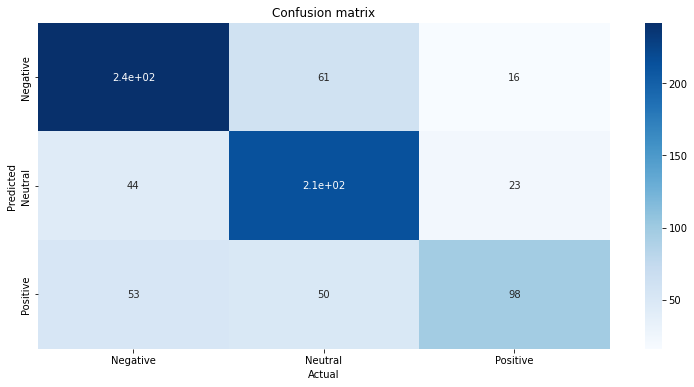

In [11]:
aux_df = df[['label','label_cat']].drop_duplicates().sort_values('label')
conf_matrix = confusion_matrix(y_test,mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['label_cat'].values, 
            yticklabels=aux_df['label_cat'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [16]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(y_train, mnbc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.830937,0.69125


In [17]:
with open('../Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('../Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)